In [1]:
import pandas as pd 
divorce = pd.read_csv("divorce.csv",parse_dates=["marriage_date"])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [2]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


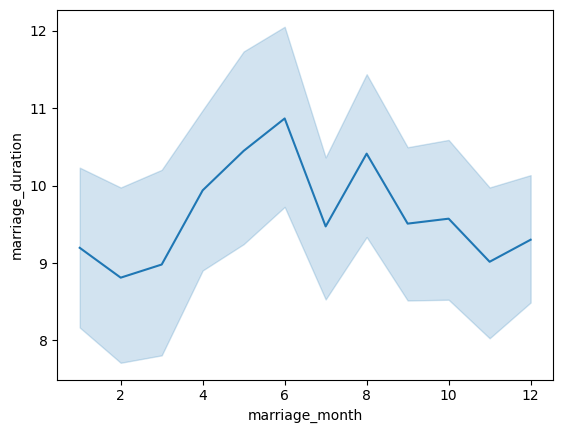

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data = divorce, x="marriage_month",y ="marriage_duration")
plt.show()

In [4]:
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
print(divorce.dtypes)

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_month                int32
dtype: object


In [5]:
divorce["marriage_year"] = divorce["marriage_date"].dt.year
print(divorce[["marriage_date","marriage_year"]].head())

  marriage_date  marriage_year
0    2000-06-26           2000
1    2001-09-02           2001
2    2000-02-02           2000
3    2006-05-13           2006
4    2007-08-06           2007


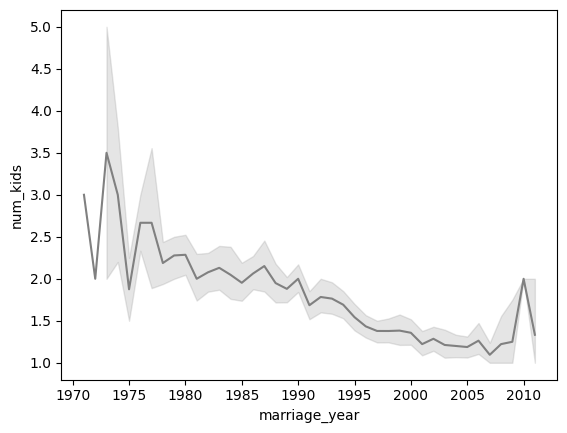

In [6]:
sns.lineplot(data = divorce, x="marriage_year",y ="num_kids",color='gray')
plt.show()

In [7]:
divorce.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_month,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.013652,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551,-0.461495
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000,-0.011456
marriage_year,0.019170,0.026433,-0.812469,-0.461495,-0.011456,1.000000


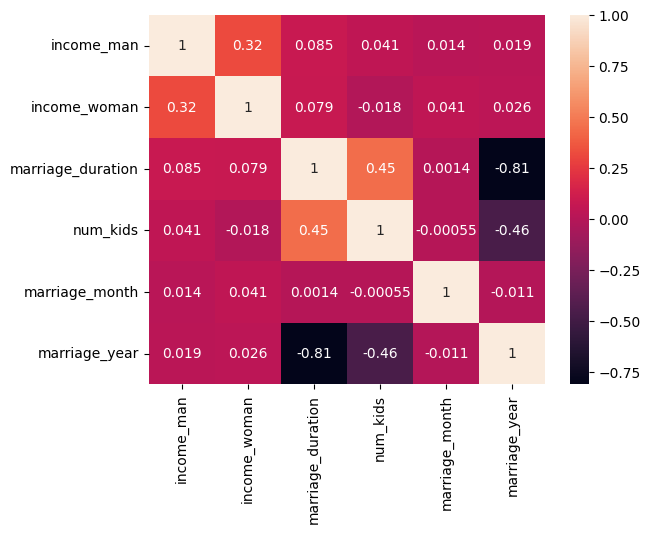

In [8]:
sns.heatmap(divorce.corr(numeric_only=True),annot = True)
plt.show()

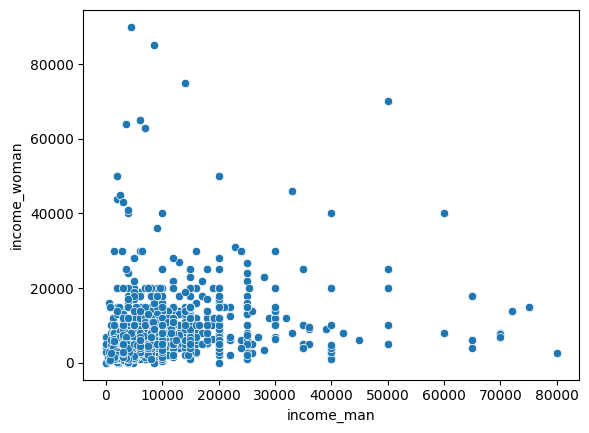

In [9]:
sns.scatterplot(data = divorce, x="income_man", y= "income_woman")
plt.show()

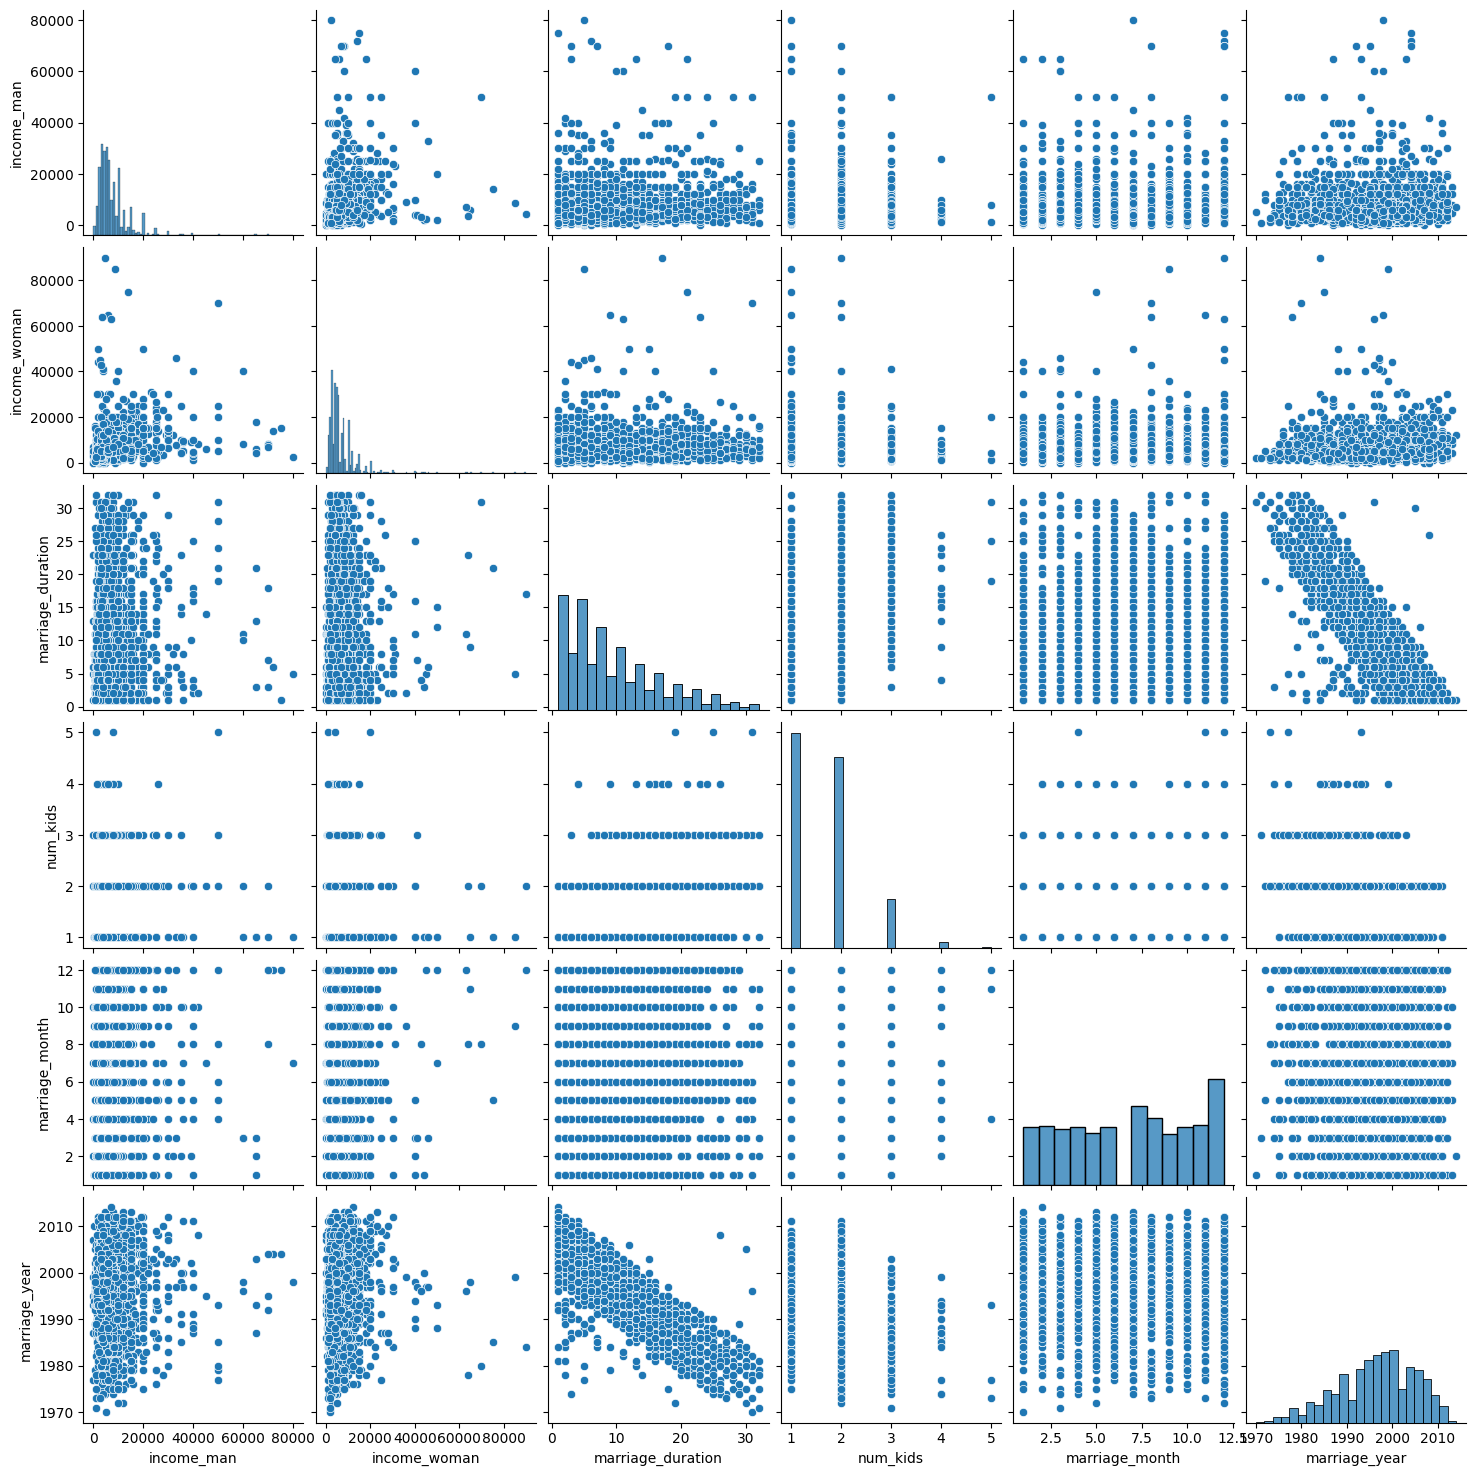

In [10]:
sns.pairplot(data = divorce)
plt.show()

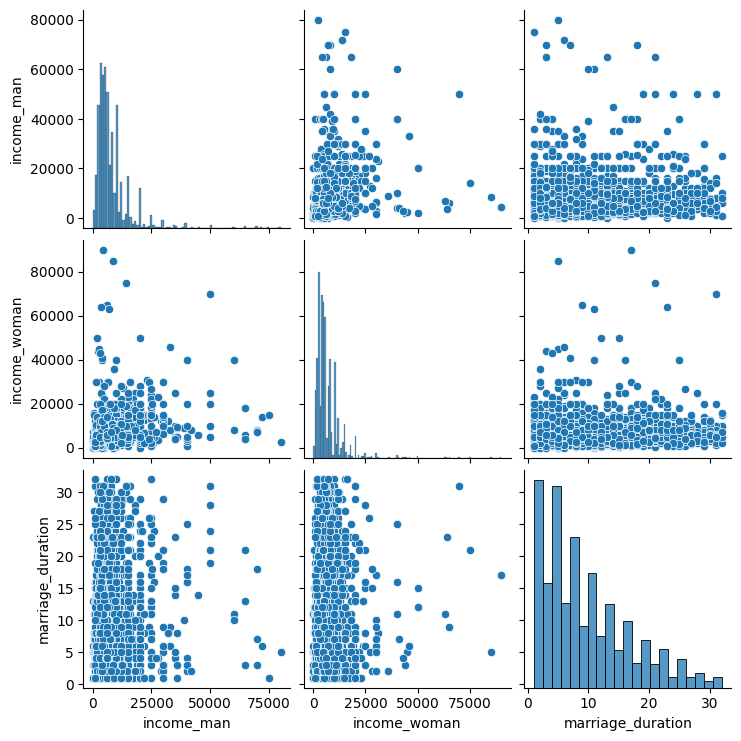

In [11]:
sns.pairplot(data = divorce, vars = ["income_man","income_woman","marriage_duration"])
plt.show()

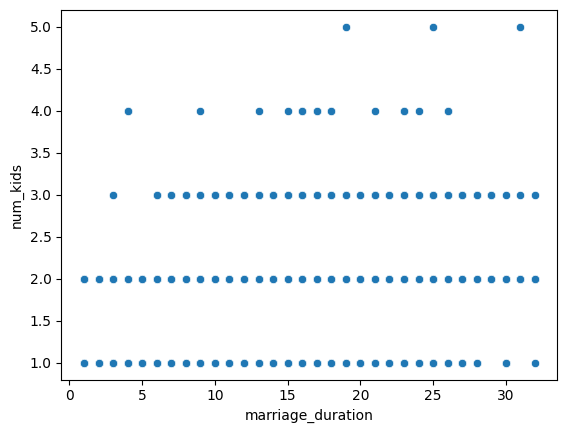

In [12]:
sns.scatterplot(data =divorce,x="marriage_duration",y="num_kids")
plt.show()

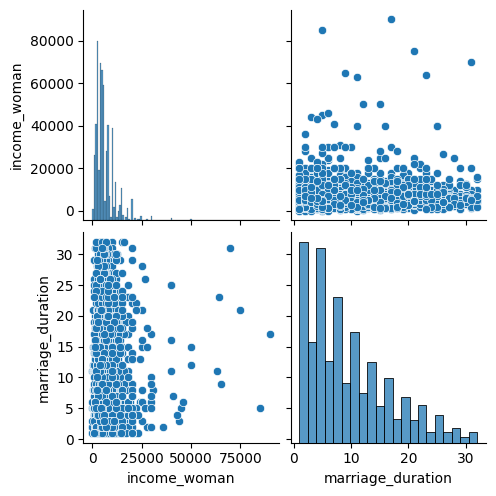

In [13]:
sns.pairplot(data = divorce,vars =["income_woman","marriage_duration"])
plt.show()

In [14]:
divorce["education_man"].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_month         0
marriage_year          0
dtype: int64
divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_month         0
marriage_year          0
num_kids_temp          0
dtype: int64


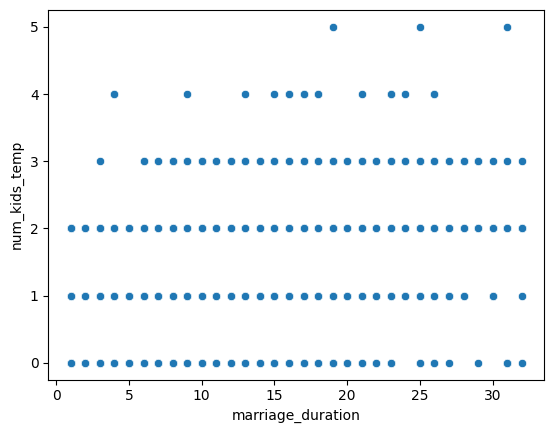

In [15]:
print(divorce.isna().sum())
divorce['num_kids_temp'] = divorce["num_kids"].fillna(0)
print(divorce.isna().sum())
sns.scatterplot(data = divorce,x="marriage_duration",y="num_kids_temp")
plt.show()

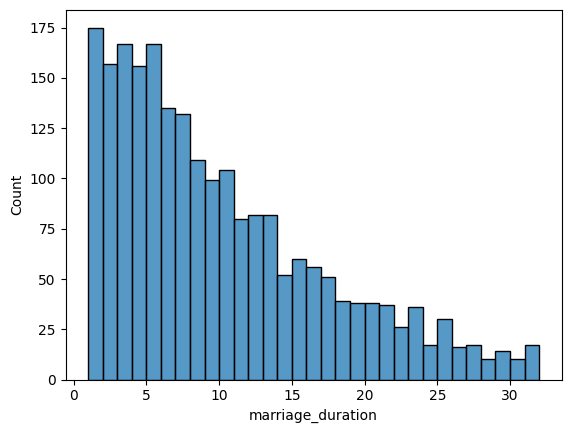

In [16]:
sns.histplot(data = divorce, x="marriage_duration",binwidth=1)
plt.show()

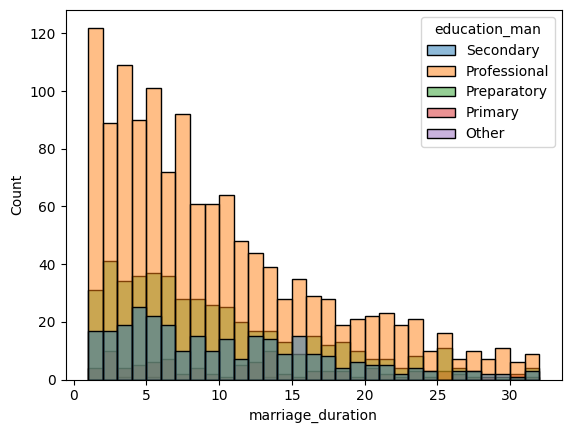

In [17]:
sns.histplot(data = divorce, x="marriage_duration",hue="education_man",binwidth=1)
plt.show()

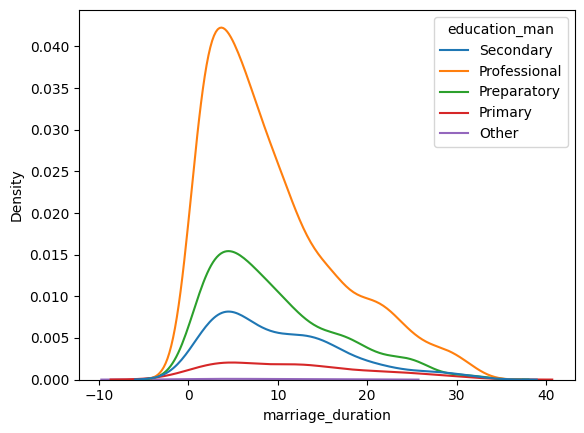

In [18]:
sns.kdeplot(data=divorce,x="marriage_duration",hue="education_man")
plt.show()

In [20]:
divorce['dob_man'] = pd.to_datetime(divorce['dob_man'])
divorce['dob_woman'] = pd.to_datetime(divorce['dob_woman'])
divorce['marriage_year'] = pd.to_datetime(divorce['marriage_date']).dt.year

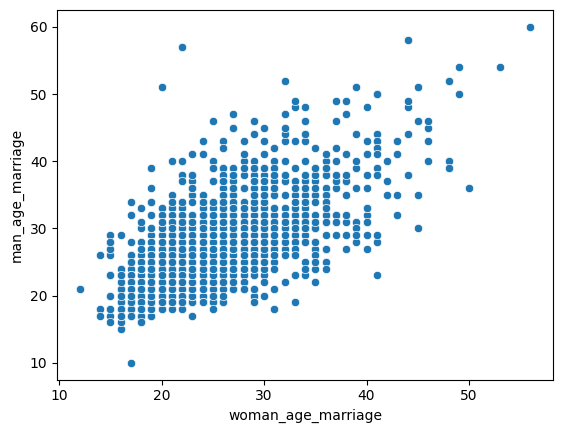

In [21]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

sns.scatterplot(data = divorce, x = "woman_age_marriage", y = 'man_age_marriage')
plt.show()

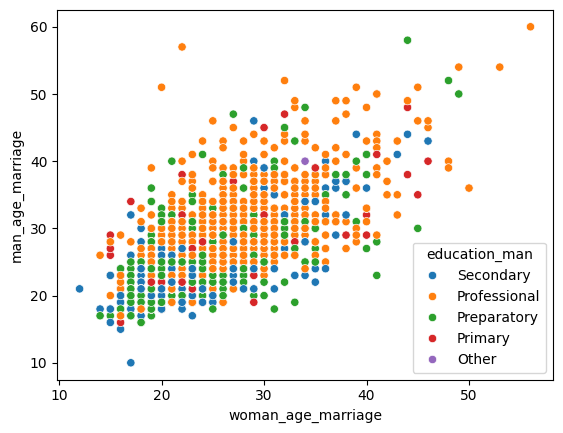

In [22]:
sns.scatterplot(data = divorce, x = "woman_age_marriage", y = 'man_age_marriage',hue='education_man')
plt.show()

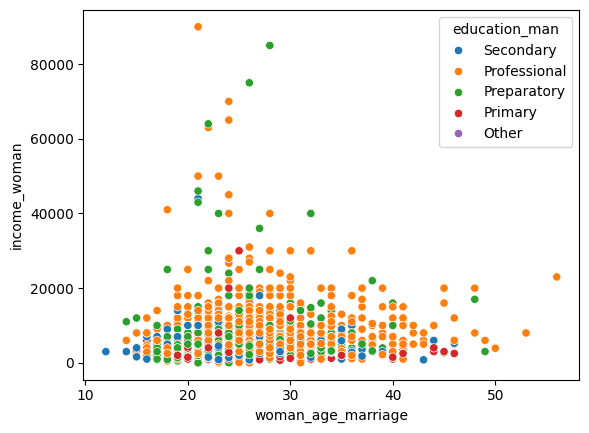

In [23]:
sns.scatterplot(data = divorce, x = "woman_age_marriage", y = 'income_woman',hue='education_man')
plt.show()

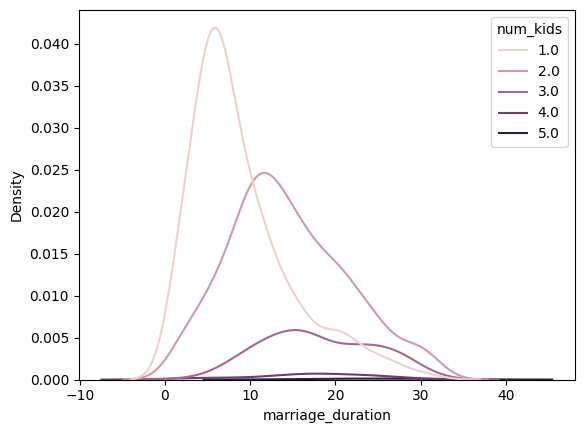

In [24]:
sns.kdeplot(data=divorce,x="marriage_duration",hue="num_kids")
plt.show()

In [25]:
planes = pd.read_csv('Airlines_unclean.csv')
print(planes["Destination"].value_counts())

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64


In [26]:
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [27]:
pd.crosstab(planes["Source"],planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [28]:
pd.crosstab(planes["Source"],planes["Destination"],values=planes["Price"],aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [29]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Unnamed: 0    Price
Source   Destination                     
Banglore Delhi            5295.0   4823.0
         New Delhi        5401.5  10976.5
Chennai  Kolkata          5427.0   3850.0
Delhi    Cochin           5282.5  10262.0
Kolkata  Banglore         5326.0   9345.0
Mumbai   Hyderabad        5371.0   3342.0

In [30]:
salaries = pd.read_csv('Salary_Rupee_USD.csv',index_col=0)
print(salaries.head())

   Working_Year                 Designation Experience Employment_Status  \
0          2020  Machine Learning Scientist         SE                FT   
1          2020           Big Data Engineer         SE                FT   
2          2020        Product Data Analyst         MI                FT   
3          2020   Machine Learning Engineer         SE                FT   
4          2020                Data Analyst         EN                FT   

   Salary_In_Rupees Employee_Location Company_Location Company_Size  \
0        20700000.0                JP               JP            S   
1         8680000.0                GB               GB            M   
2         1590000.0                HN               HN            S   
3        11900000.0                US               US            L   
4         5730000.0                US               US            L   

   Remote_Working_Ratio  Salary_USD      Job_Category  
0                     0  248256.840  Machine Learning  
1   

In [31]:
relative_frequency = salaries['Job_Category'].value_counts(normalize=True)
print(relative_frequency)

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


In [32]:
company_size_experience = pd.crosstab(salaries['Company_Size'], salaries['Experience'])
print(company_size_experience)

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [33]:
job_category_company_size = pd.crosstab(index=salaries['Job_Category'], columns=salaries['Company_Size'])
print(job_category_company_size)

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


In [34]:
mean_salary = pd.crosstab(index=salaries['Job_Category'], columns=salaries['Company_Size'], values=salaries['Salary_USD'], aggfunc='mean')
print(mean_salary)

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


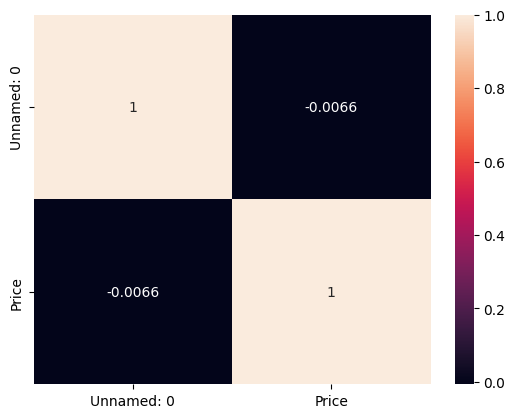

In [35]:
sns.heatmap(planes.corr(numeric_only=True),annot = True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10233 non-null  object        
 1   Date_of_Journey  10338 non-null  datetime64[ns]
 2   Source           10473 non-null  object        
 3   Destination      10313 non-null  object        
 4   Route            10404 non-null  object        
 5   Dep_Time         10400 non-null  object        
 6   Arrival_Time     10466 non-null  object        
 7   Duration         10446 non-null  float64       
 8   Total_Stops      10448 non-null  object        
 9   Additional_Info  10071 non-null  object        
 10  Price            10044 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 999.4+ KB
None


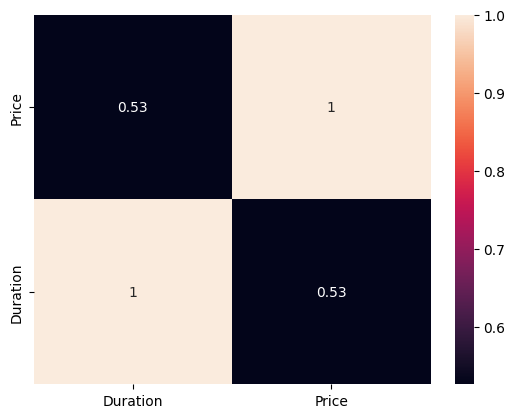

In [36]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0,
parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'], date_format = "%d/%m/%Y" )
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.info())
ax = sns.heatmap(planes.corr(numeric_only=True), annot=True)
ax.set_ylim([0,2])
plt.show()

In [37]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())
#planes = planes.drop(columns = ['Additional_Info’])
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [38]:
print(planes["Total_Stops"].value_counts)

<bound method IndexOpsMixin.value_counts of 0         2 stops
1          1 stop
2          1 stop
3        non-stop
4          1 stop
           ...   
10654    non-stop
10655    non-stop
10656    non-stop
10658    non-stop
10659     2 stops
Name: Total_Stops, Length: 8508, dtype: object>


In [39]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
print(planes.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      2019-03-12  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time     Arrival_Time  Duration Total_Stops  \
0     9:25   10/6/2023 4:25     19.00           2   
1    18:05            23:30      5.25           1   
2    16:50            21:35      4.45           1   
3     9:00            11:25      2.25           0   
4    18:55  13/3/2023 10:25     15.30           1   

               Additional_Info    Price  
0                      No info  13882.0  
1                      No info   6218.0  
2                      No info  13302.0  
3                      No info   3873.

In [40]:
planes['Total_Stops'] = pd.to_numeric(planes['Total_Stops'])
planes['Price'] = pd.to_numeric(planes['Price'])
planes['Duration'] = pd.to_numeric(planes['Duration'])

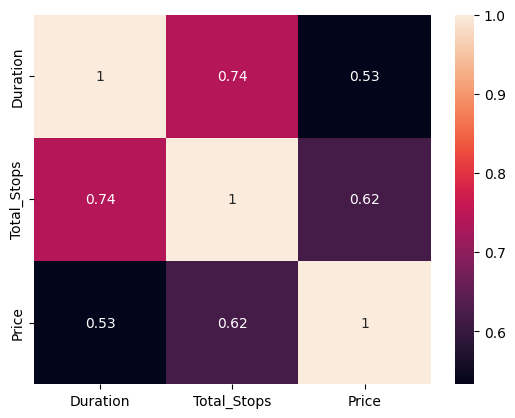

In [41]:
sns.heatmap(planes.corr(numeric_only=True),annot = True)
plt.show()

In [42]:
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month","weekday","Date_of_Journey"]].head())

   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


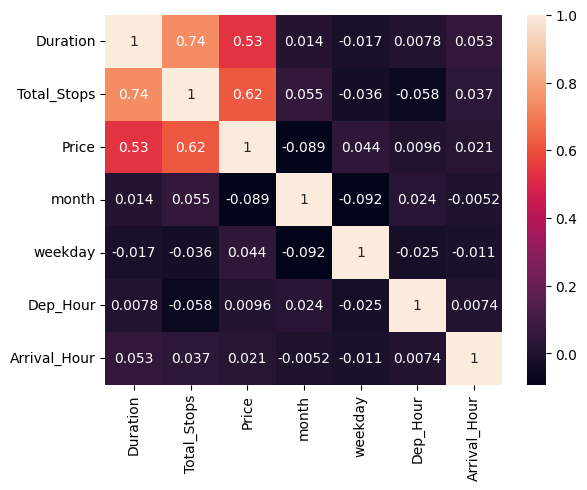

In [43]:
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'], format='mixed')
planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'], format='mixed')
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour
sns.heatmap(planes.corr(numeric_only=True), annot = True)
plt.show()

In [44]:
print(planes["Price"].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [45]:
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()

In [46]:
labels = ["Economy","Premium Economy","Business Class","First Class"]
bins = [0,twenty_fifth,median,seventy_fifth,maximum]

In [47]:
planes["Price_Category"] = pd.cut(planes["Price"],labels = labels, bins = bins)

In [48]:
print(planes[["Price","Price_Category"]].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


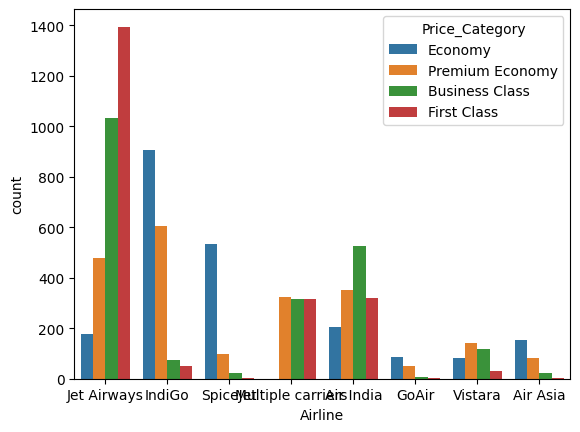

In [49]:
sns.countplot(data = planes, x ="Airline",hue = "Price_Category")
plt.show()

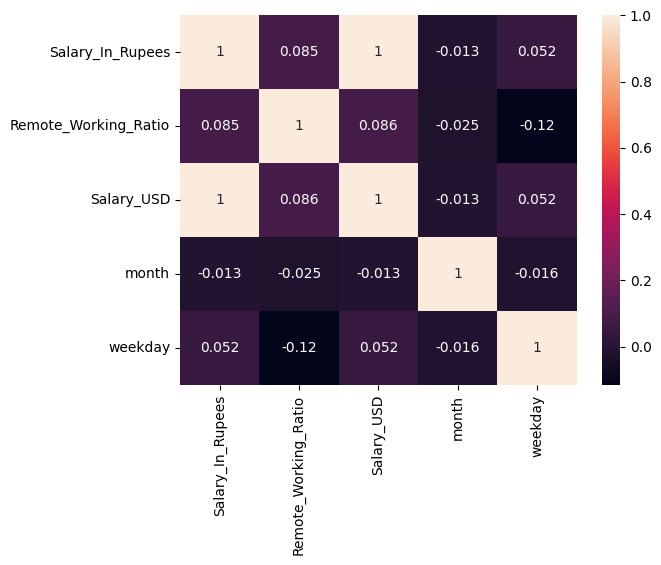

In [50]:
salaries_res = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0)

salaries_res['date_of_response'] = pd.to_datetime(salaries_res['date_of_response'], format='mixed')
salaries_res.dtypes
salaries_res['month'] = salaries_res['date_of_response'].dt.month
salaries_res['weekday'] = salaries_res['date_of_response'].dt.weekday
sns.heatmap(salaries_res.corr(numeric_only=True), annot = True)
plt.show()

In [51]:
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
salaries_median = salaries["Salary_USD"].median()
seventy_fifth = seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth,salaries_median,seventy_fifth)

60880.691999999995 97488.552 143225.1


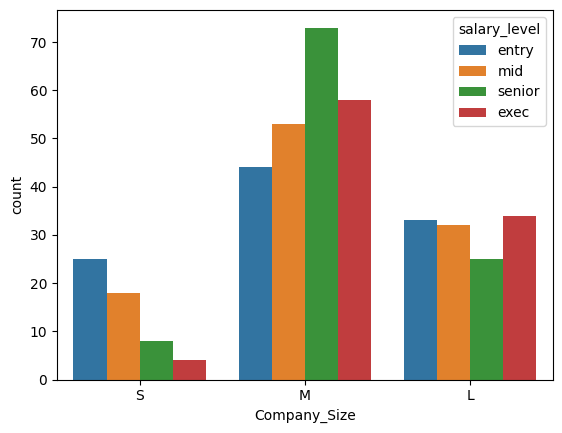

In [52]:
salary_labels = ["entry","mid","senior","exec"]
salary_ranges = [0,twenty_fifth,salaries_median,seventy_fifth,salaries["Salary_USD"].max()]
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],bins = salary_ranges,labels= salary_labels)
sns.countplot(data =salaries, x="Company_Size",hue="salary_level")
plt.show()

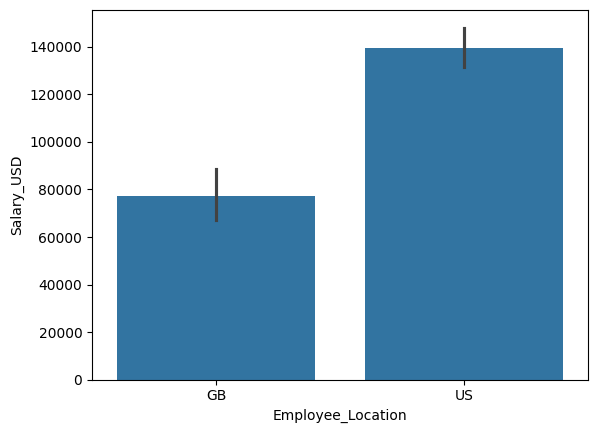

In [53]:
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US","GB"])]
sns.barplot(data=usa_and_gb,x ="Employee_Location",y="Salary_USD")
plt.show()

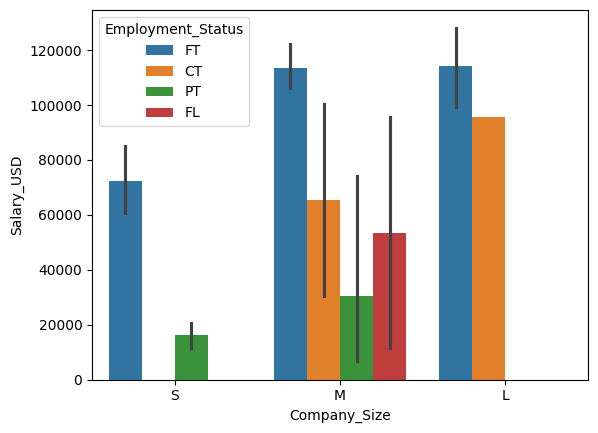

In [54]:
sns.barplot(data = salaries, y= "Salary_USD", x="Company_Size",hue= "Employment_Status")
plt.show()